In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.rc('font', size=12)
plt.rc('axes', labelsize=18)
plt.rc('lines', linewidth=2)

# Fusée à eau

Modélisation d'une fusée à eau

Références:
- voir http://www.aircommandrockets.com/
- et calcul bien plus complet http://www.et.byu.edu/~wheeler/benchtop/pix/thrust_eqns.pdf

## 0. Ordre de grandeur

Energie pompée VS energie potentielle de gravitation ?

### Energie pompée ?

on part d'une chambre d'un piston, remplie avec un gaz parfait à la pression $P_0$ et de volume $V_0$.

On a d'après la loi des gaz parfait : $P.V = P_0.V_0 = Constante$

Le travail exercé par la pression est $W = \int \! dW$

avec
$$
d W = P.dV = -V.dP
$$

donc 

$$
W = - P_0.V_0 \int_{P_0}^{P_{atm}} \frac{dP}{P} = P_0.V_0 \ln \left[  \frac{P_0}{P_{atm}} \right ]
$$

### Altitude maximale atteignable
L'énergie potentielle au point le plus haut de la trajectoire est  $E_p = mgz_{max}$. A ce point l'énergie cinétique de la fusée est nulle.

Ainsi l'altitude maximale possiblement atteignable est:
$$
z_{max} = \frac{P_0.V_0}{mg} \ln \left[  \frac{P_0}{P_{atm}} \right ]
$$

In [2]:
g = 9.81  # m.s-2
Patm = 1e5  # Pa

P0 = 4*Patm
V0 = 1e-3 # m3
m = 1 # kg

z_max = P0*V0/m/g*np.log( P0/Patm )

print( 'altitude max. : %f  en mètre '%z_max )

altitude max. : 56.525764  en mètre 


Ici n'est pas pris en compte la perte de masse de la fusée du fait de l'expulsion de l'eau et les frottements de l'air sur l'extérieure de la fusée.

Le volume d'air semble devoir être le plus grand possible, comme la masse la plus faible possible, c'est à dire une bouteille sans eau... ceci n'est pas réaliste. La poussée induite par l'expulsion de l'eau doit être considérée.

# Modéle plus précis

## 1. Expulsion de l'eau

Le premier problème est de calculer la vitesse d'expulsion de l'eau en fonction du temps. On peut imaginer un réservoire immobile, initialement sous pression, se vidant de son eau: 

Considéront une bouteille de diamètre constant $D$ et ayant un goulot de diamètre $d$.

La **conservation du débit** donne la relation entre la vitesse de l'eau en surface, noté $\dot y(t)$, et la vitesse d'écoulement dans le goulot $u$:
$$ \dot y(t) \, D^2 = u(t) \, d^2   $$

Une seconde relation est obtenue cette fois grâce à la conservation de l'énergie. C'est le **théorème de Bernouilli**:

$$
\dot y(t) ^2 + \frac{2P(t)}{\rho} = u(t)^2
$$

_Hypothèses:_ fluide non visqueux et incompressible, écoulement stationnaire? et laminaire.

$P(t)$ est la pression de l'air à l'intérieure de la bouteille. Elle diminue au fur et à mesure que la bouteille se vide. 
La **loi des gaz parfait** permet d'écrire son évolution avec la variation de volume:
$$ P V  = nRT = Constante$$

En simplifiant par la section du réservoire: 
$$ y(t) \, P(t) = Constante = y_0 \, P_0 $$


_Hypothèse: isotherme (T constant) plutôt que adiabatique._

La hauteur d'eau dans la bouteille, avec l'origine au fond de la bouteille (la bouteille est vide à $y=0$), est noté $y(t)$.


initialement remplie jusqu'à la hauteur $y = y_0$ avec de l'eau. $y(t)$ est
Le volume initial d'air est donc $\pi /4 \, D^2 $.

$\dot y$ est la vitesse de déplacement de la surface de l'eau dans la bouteille, et $u$ est la vitesse de l'eau quand elle sort de la bouteille. $P$ est la pression de l'air dans la bouteille. 







Il reste maintenant à combiner ces trois équations pour obtenir une équation différentielle fonction seulement de la hauteur d'au dans la bouteille:

$$
\dot y ^2 + \frac{2P}{\rho} = \dot y^2 \frac{D^4}{d^4}
$$

$$
\dot y ^2 \left( \frac{D^4}{d^4} -1 \right) = \frac{2P}{\rho}
$$

Pour simplifier les écritures, on remplace le rapport des diamètres $\dfrac{D}{d}$ par $\eta$ et on note $\tilde P$ la pression normée par la densité de l'eau $\rho$. L'équation devient alors:

$$
\dot y ^2 \left( \eta^4 -1 \right) = 2 \, \tilde P
$$

Maintenant, en insérant la loi des gaz parfait:
$$
\dot y ^2 \left( \eta^4 -1 \right) = 2\,\tilde P_0 \frac{y_0}{y}  
$$

L'équation différentielle finale est donc:
$$
\dot y ^2 \, y = \frac{2\, y_0\, \tilde P_0}{ \eta^4 -1 } = const.
$$

C'est une équation non-linéaire du premier ordre. La condition initiale est $y({\small t=0}) = 0$.

Il existe une solution analytique ([merci WolframAlpha](http://www.wolframalpha.com/input/?i=f*df%2Fdt%5E2+%3D+a)) de la forme:

$$
y(t) = \left(\frac{3}{2}\right)^{2/3} \left( c_1 \pm t\sqrt a  \right)^{2/3}
$$

que l'on peut reécrire plus simplement:
$$
y(t) = \left( B + A\,t  \right)^{2/3}
$$

avec les deux constantes:
$$
A = \frac{3}{2} \sqrt{   \frac{2\, y_0\, \tilde P_0}{ \eta^4 -1 } }
$$ et $$ B=y_0^{3/2} $$

_Remarque:_ Le signe est positif parce que $y$ augmente avec le temps. Quand $y$ devient supérieure à la longueur de la bouteille, le système n'est plus valide et la pousée s'arrete.  

Le temps final de la poussée, c'est-à-dire lorsqu'il n'y a plus d'eau dans la bouteille, est obtenu en cherchant $t_f$ tel que $y(t_f) = L$: 
$$
t_f = \frac{L^{3/2} -  y_0^{3/2}}{A}$$

On souhaite, pour calculer ensuite la force de poussée, aussi avoir l'expression de la vitesse de sortie de l'eau:
$$
u(t) = \eta^2 \, \dot y (t) = \frac{2}{3}  \, \eta^2 \,A \left( B+A\,t \right )^{-1/3}
$$

## 2. Dynamique de la fusée

On connait maintenant l'évolution de la fusée avec le temps. C'est la masse de l'eau restant plus la masse à vide de la fusée. On connait aussi la force de poussée due à l'évacuation de l'eau. C'est la vitesse de l'eau dans le goulot fois le débit massique  (voir [wikipedia](https://fr.wikipedia.org/wiki/Pouss%C3%A9e_(a%C3%A9rodynamique%29)): 

$$
F_P(t) = u \cdot q
$$

$F_P$ est la force de poussée, $q$ est le débit massique d'eau ejectée (en kg/s).

En remplaçant le débit massique par $q=\rho \, S\, u$, l'expression de la force devient seulement fonction de la vitesse $u(t)$:

$$
F_P(t) = \rho \, d^2 \, \frac{  \pi}{4} \; u(t)^2 
$$

Ou bien, en fonction de la vitesse de la surface de l'eau (pour mémoire $\eta = D/d$):
$$
F_P(t) =  \rho \, D^2 \,  \frac{  \pi}{4} \; \dot y^2
$$

On peut aussi prendre en compte la **trainée aérodynamique**, c'est à dire les frottements de l'air ([wikipedia](https://fr.wikipedia.org/wiki/Tra%C3%AEn%C3%A9e)), avec l'expression suivante:

$$
F_{t} = - \frac{\rho_{air}\,S\, C_x}{2} v^2
$$

Enfin, la **somme des forces** est équale à la variation de quantité de mouvement:

$$
\frac{d}{dt}(\, mv \,) = F_P(t) - g\,m(t) - F_v( v )
$$

$v$ est la vitesse de la fusée, $m(t)$ sa masse et $g$ l'accélération de gravité. Après la dérivation du produit $mv$, on obtient:

$$
m(t)\frac{d\, v}{dt} = -m(t)\, g - F_v( v ) - v\,\dot m(t)
$$

L'évolution de la masse $m(t)$ est connue. Il est donc possible de résoudre cette équation numériquement.


_note:_ il manque, entre autre, la phase de poussée du fait du gaz restant après l'expulsion de toute l'eau...

_note:_ La pousée initiale est :
$$
F_P(t=0) = \frac{4}{9} \frac{A^2}{y_0}  \cdot \eta^2 \, \rho \, d^2 \,  \pi/4
$$

$$
F_P(t=0)  =   \frac{1}{ \eta^4 -1 }  P_0 \, D^2 \,  \pi/2
$$

Dimensions de bouteille:
- http://percolat.free.fr/0304dimensions.htm
- http://percolat.free.fr/documentation/silhouettes/echel1_COCACOLA.GIF

In [181]:
class WaterRocket():
    # Constantes 
    g = 9.81  # m.s-2, gravité
    Patm = 1e5  # Pa, pression atmosphérique
    
    def __init__(self, P_0=5*Patm, D=88e-3, d=26e-3, L=330e-3,
                       mVide = .1, alpha=.5, rho = 1000, Cx=.3 ):
        
        # Parametres:
        self.P_0 = P_0 # Pa, pression initiale dans la bouteille
        self.D = D # m, diametre de la bouteille
        self.d = d # m, diametre du goulot
        self.L = L # m, longueur de la bouteille
        self.mVide = mVide # kg, masse à vide
        self.alpha = alpha  # proportion volume eau/totale
        self.rho = rho # kg/m3, densité du fluide (eau)
        self.Cx = Cx # coefficient de traînée
        
        # Constantes utilisées dans le calcul:
        self.y0 = self.L*(1 - self.alpha)  # m - hauteur d'air initiale
        self.eta = self.D/self.d  # rapport de diamètre

        self.A = 3/2.*np.sqrt( 2*self.y0*self.P_0/self.rho/( self.eta**4 - 1 )  ) # constante de l'équation
        self.B = self.y0**(3/2.) # constante de l'équation
        
        self.tf = (self.L**(3/2.) - self.y0**(3/2.))/self.A # s, durée de la propulsion
        
        self.section = np.pi/4.*self.D**2 # m2, section/aire de la bouteille
        self.volume = self.section * self.L  # m3, volume de la bouteille

        
    def y_t(self, t):
        ''' Position de la surface de l'eau en fonction du temps (s).
        '''
        return (self.B + self.A*t)**(2/3.)
    
    def ydot_t(self, t):
        ''' Vitesse de la surface de l'eau en fonction du temps (m/s).
        '''
        return 2/3.*self.A*(self.B + self.A*t)**(-1/3.)
    
    def Fp_t(self, t):
        ''' Force de poussée aérodynamique (N) en fonction du temps (s).
        '''
        return self.ydot_t(t)**2 * self.eta**2 *self.rho*self.d**2 *np.pi/4.

    def masse_y( self, y ):
        ''' Masse de la fusée en fonction de la position de la surface de l'eau.
        '''
        y_eau = self.L - y
        return self.rho * self.section * y_eau  +  self.mVide
    
    def masse_t( self, t):
        ''' Masse de la fusée en fonction du temps.
        '''
        y = self.y_t( t )
        return self.masse_y( y )
    
    def mdot_t( self, t ):
        ''' Dérivée de la masse de la fusée en fonction du temps.
        '''
        ydot = self.ydot_t( t )
        return - self.rho * self.section * ydot
    
    def Fp0(self):
        ''' Force de pousée à t=0 (N)
        ''' 
        return self.eta**2/(self.eta**4-1)*self.P_0*self.d**2*np.pi/2.
    
    def Ftrainee_v(self, v):
        ''' Force de trainée aérodynamique
            v est la vitesse de la fusée
        '''
        rhoAir = 1.204 # kg/m3, masse volumique de l'air 
        return .5*rhoAir*self.Cx * self.section* v**2

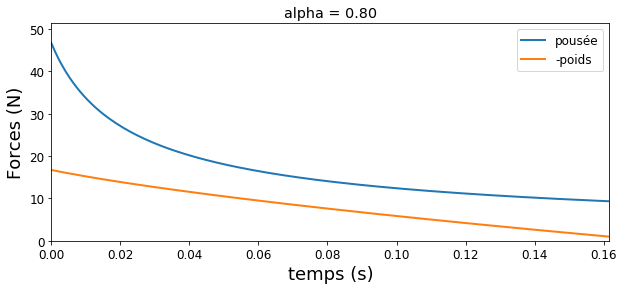

In [182]:
rocket = WaterRocket( alpha = .8 )
temps = np.linspace( 0, rocket.tf, 156 )

plt.figure(figsize=(10, 4)); plt.title('alpha = %.2f'%rocket.alpha);
plt.plot( temps, rocket.Fp_t( temps ), label=u'pousée' );
plt.plot( temps, rocket.g*rocket.masse_t(temps) ,label='-poids' );
plt.xlabel('temps (s)'); plt.ylabel(u'Forces (N)');
plt.ylim([0, 1.1*rocket.Fp0()]);
plt.xlim([0, temps[-1]]);
plt.legend();

# Résolution numérique de la trajectoire

la résolution numérique est décomposée en deux périodes:
- au début, la force de la poussée est présente.
- après $t=t_f$, la bouteille est vide. Elle continue de monter sur son élan (intertie).

In [75]:
from scipy.integrate import odeint

In [81]:
def dYdt_poussee(Y, t, rocket):
    ''' Equation pour la période de poussée.
        Retourne la dérivée de la fonction Y = [ z, v ]
        `t` en le temps
        et `rocket` l'instance de d'une fusée
    '''
    z, v = Y[0], Y[1]
    
    dzdt = v
    dvdt = ( rocket.Fp_t(t) -v*rocket.mdot_t(t) )/rocket.masse_t(t)  - rocket.g
    
    return [ dzdt, dvdt ]


def dYdt_balistique(Y, t, rocket):
    ''' Equation pour la période de vol 'balistique'.
        Retourne la dérivée de la fonction Y = [ z, v ]
        `t` en le temps
        et `rocket` l'instance de d'une fusée
    '''
    z, v = Y[0], Y[1]
    
    dzdt = v
    dvdt = - rocket.g - rocket.Ftrainee_v(v)/rocket.mVide
    
    return [ dzdt, dvdt ]

In [192]:
def simulateur( rocket ):
    ''' Simule le lancement de la fusée
        retourne le temps, et Y = [position, vitesse]
    '''
    N_poussee = 29 # nombre de points
    Y0 = [0, 0]  # altitude et vitesse initiale
    
    tempsPoussee = np.linspace( 0, rocket.tf, N_poussee ) # vecteur temps
    # solve:
    Ypoussee = odeint( dYdt_poussee, y0, tempsPoussee, args=(rocket,)  )
    
    # Calcul du temps de fin de la pédiode balistique:
    z0, v0 = Ypoussee[-1, 0], Ypoussee[-1, 1]
    z_max = v0**2/2./rocket.g + z0 # altitude maximal purement balistique (pas de frottement)
    tf_balistique = 2*v0/rocket.g + rocket.tf
    
    N_balistique = 121 # nombre de points
    tempsBalistique = np.linspace( rocket.tf, tf_balistique, N_balistique )
    Y0 = Ypoussee[-1, :] # le dernier état devient l'état initial
    Ybalistique = odeint( dYdt_balistique, Y0, tempsBalistique, args=(rocket,) )
    
    temps = np.concatenate((tempsPoussee, tempsBalistique[1:]), axis=0)
    Y = np.concatenate((Ypoussee, Ybalistique[1:, :]), axis=0)
    
    return temps, Y

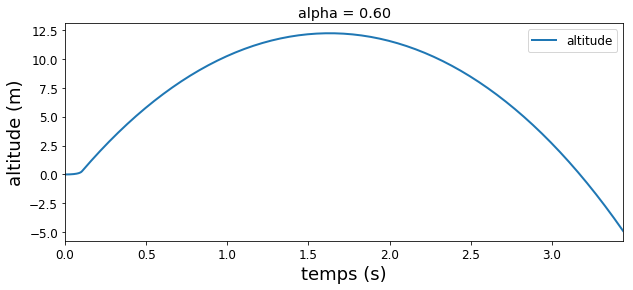

In [193]:
rocketParams = {'P_0':4e5,
                'alpha':.6,
                'D':88e-3,
                'd':26e-3,
                'L':330e-3,
                'mVide':.1,
                'rho':1000,
                'Cx':.3 }

rocket = WaterRocket( **rocketParams )
temps, Y = simulateur( rocket )

plt.figure(figsize=(10, 4)); plt.title('alpha = %.2f'%rocket.alpha);
plt.plot( temps, Y[:, 0], '-', label=u'altitude' );
plt.xlabel('temps (s)'); plt.ylabel(u'altitude (m)');
plt.xlim([0, temps[-1]]);
plt.legend();

## Optimisation pour atteindre l'altitude maximal

In [194]:
from scipy.optimize import fmin

In [148]:
def altitudeMax( rocket ):
    ''' Effectue la simulation de la fusée
        et retourne l'altitude maximale atteinte
    '''
    temps, Y = simulateur( rocket )
    return  np.max( Y[:, 0] )

In [149]:
altitudeMax( rocket )

12.216213101264229

## 1. taux de remplissage optimal

Optimization terminated successfully.
         Current function value: -12.284923
         Iterations: 13
         Function evaluations: 26
taux de remplissage optimal:  0.5746875


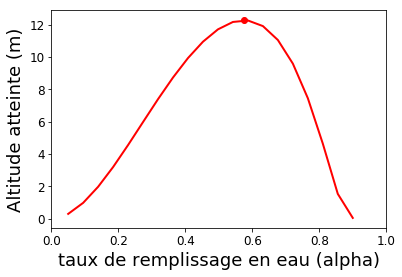

In [152]:
rocketparams = {'P_0':4e5,
                'D':88e-3,
                'd':26e-3,
                'L':330e-3,
                'mVide':.1,
                'rho':1000,
                'Cx':.3 }
            
alpha_range = np.linspace(.05, .9, 20)
altitude = [ altitudeMax( WaterRocket( **rocketparams, alpha=a ) ) for a in  alpha_range ]
    
alphaMax = fmin(lambda a:-altitudeMax( WaterRocket( **rocketparams, alpha=a ) ) , .4)
                    
plt.plot( alpha_range, altitude, 'r' );
plt.plot( alphaMax, altitudeMax( WaterRocket( **rocketparams, alpha=alphaMax[0] ) ), 'or' );
print('taux de remplissage optimal: ', alphaMax[0])
plt.xlabel('taux de remplissage en eau (alpha)');
plt.ylabel('Altitude atteinte (m)'); plt.xlim([0, 1]);

### 2. Diamètre du goulot optimal
_Remarque:_  Quand $\eta \to 1$, le système diverge... on peut imaginer une fusée sans eau, équivalent à un boulet dans un fût de canon... On sort de l'hypothèse stationnaire du théorème de Bernouilli... il faut prendre en compte l'accélération de l'eau dans la bouteille...

Quand $\eta \to 0$, il manque la viscosité de l'eau... et Reynolds?

/home/etienne/Projets/xdze2.github.io-src/py3/lib/python3.5/site-packages/scipy/integrate/odepack.py:218: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


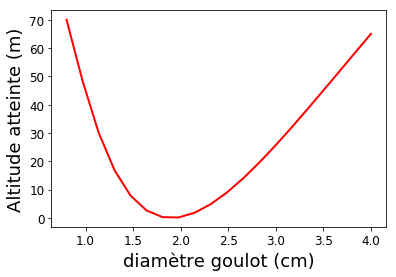

In [173]:
rocketparams = {'P_0':4e5,
                'alpha':.6,
                'D':88e-3,
                'L':330e-3,
                'rho':1000,
                'mVide': .1,
                'Cx':.3 }
            
dia_range = np.linspace(8e-3, 40e-3, 20)
altitude = [ altitudeMax( WaterRocket( **rocketparams, d=a ) ) for a in  dia_range ]
                     
plt.plot( dia_range*1e2, altitude, 'r' );
plt.xlabel(u'diamètre goulot (cm)');
plt.ylabel('Altitude atteinte (m)');

## 3. masse à vide

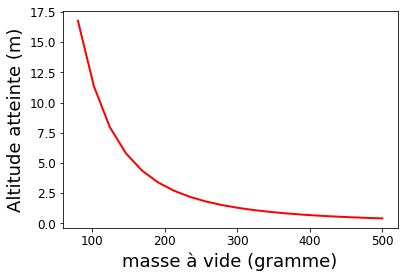

In [183]:
rocketparams = {'P_0':4e5,
                'alpha':.5,
                'D':88e-3,
                'd':26e-3,
                'L':330e-3,
                'rho':1000,
                'Cx':.3 }
            
mVide_range = np.linspace(.08, .5, 20)
altitude = [ altitudeMax( WaterRocket( **rocketparams, mVide=a ) ) for a in  mVide_range ]
                     
plt.plot( mVide_range*1e3, altitude, 'r' );
plt.xlabel('masse à vide (gramme)');
plt.ylabel('Altitude atteinte (m)');

## 4. masse volumique du fluide 'propulsant'

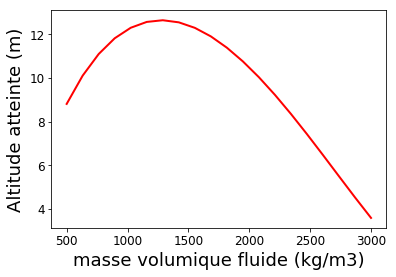

In [185]:
rocketparams = {'P_0':4e5,
                'alpha':.6,
                'D':88e-3,
                'd':26e-3,
                'L':330e-3,
                'mVide':.1,
                'Cx':.3 }
            
rhoFluide_range =  np.linspace(500, 3000, 20)
altitude = [ altitudeMax( WaterRocket( **rocketparams, rho=a ) ) for a in  rhoFluide_range ]
                     
plt.plot( rhoFluide_range, altitude, 'r' );
plt.xlabel('masse volumique fluide (kg/m3)');
plt.ylabel('Altitude atteinte (m)');